### Imports

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [4]:
# SET TO TRUE IF YOU ARE RELOADING DATA
load_data = False

### Load data

In [5]:
# MERGING AND CLEANING DATA FILES
# DON'T RUN IF FINAL DATA IS ALREADY DOWNLOADED
def clean_column_names(df):
    return df.rename(columns=lambda x: x.replace('ï»¿', '').strip()).rename(
        columns={
            'EMP_YEAR_COMMENCED_BUSINESS': 'EMPLOYER_YEAR_COMMENCED_BUSINESS',
            "EMP_INFO_DECL_TITLE": "EMP_DECL_TITLE",
            'FOREIGN_WORKER_LIVE_IN_DOM_SVC_CNT': 'FOREIGN_WORKER_LIVE_IN_DOM_CNT',
            'EMPLOYER_STATE_PROVINCE':'EMPLOYER_STATE'
        }
    ).dropna(how='all').drop_duplicates()

if load_data:
    files = [
        'yearly_data/PERM_Disclosure_Data_FY20.xlsx',
        'yearly_data/PERM_Disclosure_Data_FY21.xlsx',
        'yearly_data/PERM_Disclosure_Data_FY22.xlsx',
        'yearly_data/PERM_Disclosure_Data_FY23.xlsx',
        'yearly_data/PERM_Disclosure_Data_FY24.xlsx'
    ]

    dfs = []
    for file in files:
        print('cleaning new file')
        df = clean_column_names(pd.read_excel(file))
        dfs.append(df)

    print('Saving to csv')
    df = pd.concat(dfs, ignore_index=True)
    df.drop('EMPLOYEE_FEIN')
    df.to_csv('raw_data_20_24.csv', index=False)

### Data Preprocessing

In [7]:
# LOADING DATA
df = pd.read_csv('raw_data_20_24.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'raw_data_20_24.csv'

In [ ]:
print(df.shape)
df.head()

(515447, 159)


,Unnamed: 0.1,Unnamed: 0,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,...,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_DECL_TITLE,FOREIGN_WORKER_LIVE_IN_DOM_CNT.1,EMPLOYER_FEIN,year
0,0,0,A-09245-62715,Denied,2009-09-03,2020-04-30 14:50:29,N,NaN,NaN,N,...,N,N,Christopher E Kurczaba,Attorney,kurczabalaw@sbcglobal.net,Zygmunt Oparowski,President,NaN,NaN,2020
1,1,1,A-10070-89932,Certified,2019-10-22,2020-09-04 10:06:40,N,NaN,NaN,N,...,Y,N,James E McLaughlin III,Attorney,perm@murthy.com,Sunitha Shivaram,CEO,NaN,NaN,2020
2,2,2,A-10119-96737,Certified-Expired,2010-03-29,2019-10-18 11:34:37,Y,2000-09-15,MARYLAND,N,...,N,N,WINSTON W TSAI,ATTORNEY AT LAW,WINSTONTSAI@AOL.COM,FIL PARONG,HEAD OF HOUSEHOLD,NaN,NaN,2019
3,3,3,A-10225-13679,Denied,2010-08-10,2020-04-30 07:55:08,N,NaN,NaN,N,...,N,N,DANIEL J SULLIVAN,ATTORNEY,GWG8@AOL.COM,DAVID GLENN,OWNER,NaN,NaN,2020
4,4,4,A-10334-34885,Certified,2010-12-02,2020-08-24 13:12:51,N,NaN,NaN,N,...,Y,N,Kavitha Ramasami,Attorney at Law,kavitha@usimmigrationesq.com,Kishore Ganji,President and CEO,NaN,NaN,2020


In [ ]:
df.columns.tolist()

['Unnamed: 0.1',
 'Unnamed: 0',
 'CASE_NUMBER',
 'CASE_STATUS',
 'RECEIVED_DATE',
 'DECISION_DATE',
 'REFILE',
 'ORIG_FILE_DATE',
 'PREVIOUS_SWA_CASE_NUMBER_STATE',
 'SCHD_A_SHEEPHERDER',
 'EMPLOYER_NAME',
 'EMPLOYER_ADDRESS_1',
 'EMPLOYER_ADDRESS_2',
 'EMPLOYER_CITY',
 'EMPLOYER_STATE',
 'EMPLOYER_COUNTRY',
 'EMPLOYER_POSTAL_CODE',
 'EMPLOYER_PHONE',
 'EMPLOYER_PHONE_EXT',
 'EMPLOYER_NUM_EMPLOYEES',
 'EMPLOYER_YEAR_COMMENCED_BUSINESS',
 'NAICS_CODE',
 'FW_OWNERSHIP_INTEREST',
 'EMP_CONTACT_NAME',
 'EMP_CONTACT_ADDRESS_1',
 'EMP_CONTACT_ADDRESS_2',
 'EMP_CONTACT_CITY',
 'EMP_CONTACT_STATE_PROVINCE',
 'EMP_CONTACT_COUNTRY',
 'EMP_CONTACT_POSTAL_CODE',
 'EMP_CONTACT_PHONE',
 'EMP_CONTACT_EMAIL',
 'AGENT_ATTORNEY_NAME',
 'AGENT_ATTORNEY_FIRM_NAME',
 'AGENT_ATTORNEY_PHONE',
 'AGENT_ATTORNEY_PHONE_EXT',
 'AGENT_ATTORNEY_ADDRESS_1',
 'AGENT_ATTORNEY_ADDRESS_2',
 'AGENT_ATTORNEY_CITY',
 'AGENT_ATTORNEY_STATE_PROVINCE',
 'AGENT_ATTORNEY_COUNTRY',
 'AGENT_ATTORNEY_POSTAL_CODE',
 'AGENT_ATTORNEY

In [ ]:
print('MISSING VALUES BEFORE DROPPING COLUMNS WITH >30% MISSING DATA: ')
print(df.shape)
df.isnull().sum().reset_index().rename(columns={'index': 'Column', 0: 'Missing_Values'}).sort_values(by='Missing_Values', ascending=False).head(10)

MISSING VALUES BEFORE DROPPING COLUMNS WITH >30% MISSING DATA: 
(515447, 159)


,Column,Missing_Values
124,PAYMENT_DETAILS,515439
87,FOREIGN_WORKER_LIVE_IN_DOM_CNT,515322
156,FOREIGN_WORKER_LIVE_IN_DOM_CNT.1,515166
7,ORIG_FILE_DATE,515091
8,PREVIOUS_SWA_CASE_NUMBER_STATE,515077
104,JOB_FAIR_TO_DATE,514044
103,JOB_FAIR_FROM_DATE,514043
105,ON_CAMPUS_RECRUITING_FROM_DATE,513277
106,ON_CAMPUS_RECRUITING_TO_DATE,513277
66,REQUIRED_TRAINING_MONTHS,509635


In [ ]:
# drop columns we say are irrelevant
df_cleaned = df.copy()
irrelevant_cols = [
    "EMPLOYER_ADDRESS_1", "EMPLOYER_ADDRESS_2", "EMPLOYER_PHONE", "EMPLOYER_PHONE_EXT", "EMP_CONTACT_NAME",
    "EMP_CONTACT_ADDRESS_1", "EMP_CONTACT_ADDRESS_2", "EMP_CONTACT_CITY", "EMP_CONTACT_STATE_PROVINCE", "EMP_CONTACT_COUNTRY",
    "EMP_CONTACT_POSTAL_CODE", "EMP_CONTACT_PHONE", "EMP_CONTACT_EMAIL", "AGENT_ATTORNEY_ADDRESS_1", "AGENT_ATTORNEY_ADDRESS_2",
    "AGENT_ATTORNEY_EMAIL"
]
df_cleaned = df_cleaned.drop(columns=irrelevant_cols)

# drop columns with > 30% missing data
threshold = 0.3
nan_percentage = df_cleaned.isna().mean()
columns_to_drop = nan_percentage[nan_percentage > threshold].index
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

print('MISSING VALUES AFTER DROPPING COLUMNS WITH >30% MISSING DATA AND IRRELEVANT COLUMNS: ')
print(df_cleaned.shape)
df_cleaned.isnull().sum().reset_index().rename(columns={'index': 'Column', 0: 'Missing_Values'}).sort_values(by='Missing_Values', ascending=False).head(10)

MISSING VALUES AFTER DROPPING COLUMNS WITH >30% MISSING DATA AND IRRELEVANT COLUMNS: 
(515447, 92)


,Column,Missing_Values
65,JOB_SEARCH_WEBSITE_FROM_DATE,119067
66,JOB_SEARCH_WEBSITE_TO_DATE,119064
79,FOREIGN_WORKER_ED_INST_STATE_P,110624
82,FOREIGN_WORKER_EXP_WITH_EMPL,102204
41,MAJOR_FIELD_OF_STUDY,94862
81,FOREIGN_WORKER_ED_INST_POST_CD,90117
77,FOREIGN_WORKER_ED_INST_ADD_1,75886
40,MINIMUM_EDUCATION,74740
80,FOREIGN_WORKER_ED_INST_COUNTRY,73875
74,FOREIGN_WORKER_INFO_MAJOR,73603


### EDA

In [ ]:
df_cleaned.to_csv('cleaned_data_20_24.csv')

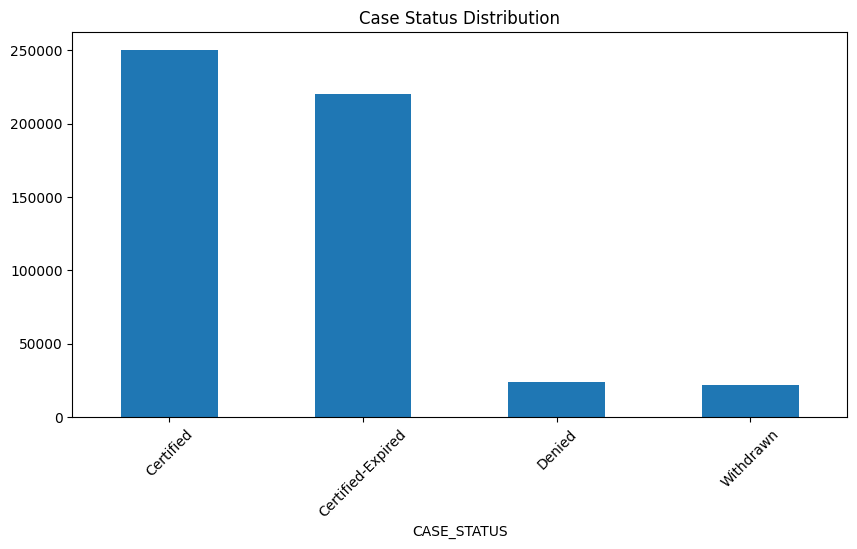

CASE_STATUS
Certified            249877
Certified-Expired    219821
Denied                24183
Withdrawn             21566
Name: count, dtype: int64


In [ ]:
case_status_counts = df_cleaned['CASE_STATUS'].value_counts()
case_status_counts.plot(kind='bar', title='Case Status Distribution', figsize=(10, 5))
plt.xticks(rotation=45)
plt.show()
print(case_status_counts)

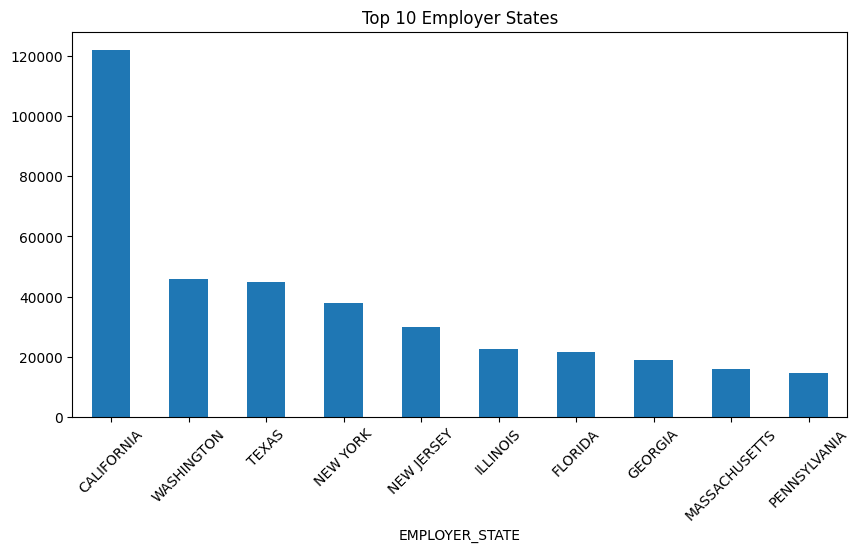

EMPLOYER_STATE
CALIFORNIA       122008
WASHINGTON        45862
TEXAS             44784
NEW YORK          37783
NEW JERSEY        29791
ILLINOIS          22676
FLORIDA           21588
GEORGIA           18825
MASSACHUSETTS     15839
PENNSYLVANIA      14634
Name: count, dtype: int64


In [ ]:
employer_state_counts = df_cleaned['EMPLOYER_STATE'].value_counts().head(10)
employer_state_counts.head(10).plot(kind='bar', title='Top 10 Employer States', figsize=(10, 5))
plt.xticks(rotation=45)
plt.show()
print(employer_state_counts)

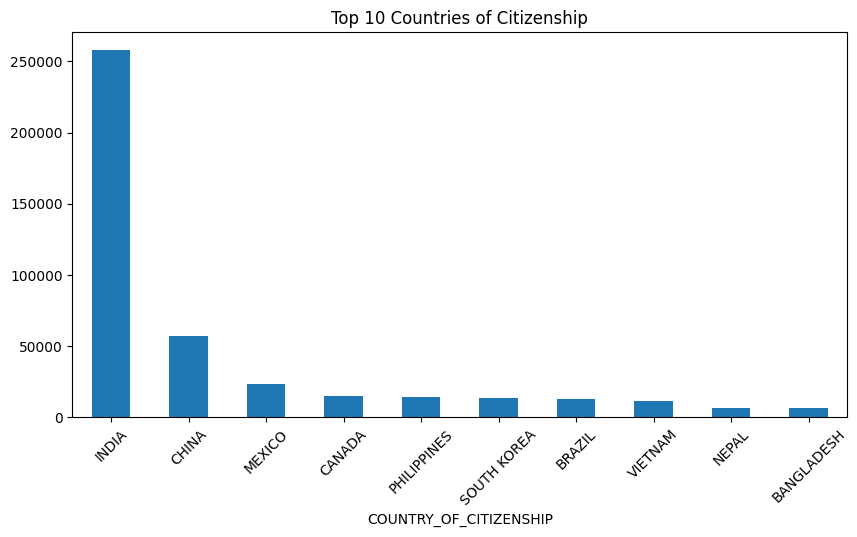

COUNTRY_OF_CITIZENSHIP
INDIA          257682
CHINA           57234
MEXICO          23016
CANADA          14607
PHILIPPINES     14206
SOUTH KOREA     13455
BRAZIL          12418
VIETNAM         11635
NEPAL            6360
BANGLADESH       6097
Name: count, dtype: int64


In [ ]:
citizenship_country_counts = df_cleaned['COUNTRY_OF_CITIZENSHIP'].value_counts().head(10)
citizenship_country_counts.head(10).plot(kind='bar', title='Top 10 Countries of Citizenship', figsize=(10, 5))
plt.xticks(rotation=45)
plt.show()
print(citizenship_country_counts)

### Merge data with State GDP

In [ ]:
import requests

user_key = '3F8ECC2A-E416-4A2F-9FFE-7D33F163ABCF'
params = {
    'UserID': user_key,
    'method': 'GetData',
    'datasetname': 'Regional',
    'TableName': 'SAGDP9N',
    'LineCode': '2',
    'Year': 'ALL',
    'GeoFips': 'STATE',
    'ResultFormat': 'JSON'
}
url = 'https://apps.bea.gov/api/data'
response = requests.get(url, params=params)
data = response.json()

gdp_df = pd.DataFrame(data['BEAAPI']['Results']['Data'])[['GeoFips', 'GeoName', 'TimePeriod', 'DataValue']]
gdp_df['DataValue'] = pd.to_numeric(gdp_df['DataValue'], errors='coerce')
gdp_df = gdp_df[gdp_df['GeoFips'] != '00000']
states = set(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
              'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
              'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
              'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
              'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
              'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
              'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'])
gdp_df = gdp_df[gdp_df['GeoName'].isin(states)]
gdp_df = gdp_df.rename(columns={'GeoName': 'state', 'TimePeriod': 'year', 'DataValue': 'GDP'})
gdp_df = gdp_df[['state', 'year', 'GDP']]
gdp_df['year'] = gdp_df['year'].astype(int)
gdp_df

,state,year,GDP
27,Alabama,2008,164772.3
28,Alabama,2007,166049.8
29,Alabama,2006,165152.7
30,Alabama,2005,162679.8
31,Alabama,2004,156070.3
...,...,...,...
1399,Wyoming,2013,32009.2
1400,Wyoming,2012,31841.0
1401,Wyoming,2011,32774.6
1402,Wyoming,2010,32958.6


In [ ]:
# DON'T RUN IF GDP IS ALREADY MERGED WITH DATA
df_cleaned['DECISION_DATE'] = pd.to_datetime(df_cleaned['DECISION_DATE'], format='mixed').dt.strftime(('%Y-%m-%d'))
df_cleaned['RECEIVED_DATE'] = pd.to_datetime(df_cleaned['RECEIVED_DATE'], format='mixed').dt.strftime(('%Y-%m-%d'))
df_cleaned['year'] = pd.to_datetime(df_cleaned['DECISION_DATE'].str.split().str[0], errors='coerce').dt.year
df_cleaned['WORKSITE_STATE'] = df_cleaned['WORKSITE_STATE'].str.title()
gdp_and_immigration_df = df_cleaned.merge(gdp_df, left_on=['WORKSITE_STATE', 'year'], right_on=['state', 'year'], how='left').drop(columns=['state', 'year'])
gdp_and_immigration_df.to_csv('cleaned_data_with_gdp.csv')

print(gdp_and_immigration_df.shape)
gdp_and_immigration_df.head()

(515447, 92)


,Unnamed: 0.1,Unnamed: 0,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_COUNTRY,EMPLOYER_POSTAL_CODE,EMPLOYER_NUM_EMPLOYEES,EMPLOYER_YEAR_COMMENCED_BUSINESS,NAICS_CODE,FW_OWNERSHIP_INTEREST,AGENT_ATTORNEY_NAME,AGENT_ATTORNEY_FIRM_NAME,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE_PROVINCE,AGENT_ATTORNEY_COUNTRY,AGENT_ATTORNEY_POSTAL_CODE,PW_TRACK_NUMBER,PW_SOC_CODE,PW_SOC_TITLE,PW_SKILL_LEVEL,PW_WAGE,PW_UNIT_OF_PAY,PW_WAGE_SOURCE,PW_DETERMINATION_DATE,PW_EXPIRATION_DATE,WAGE_OFFER_FROM,WAGE_OFFER_UNIT_OF_PAY,WORKSITE_ADDRESS_1,WORKSITE_CITY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,JOB_TITLE,MINIMUM_EDUCATION,MAJOR_FIELD_OF_STUDY,REQUIRED_TRAINING,REQUIRED_EXPERIENCE,ACCEPT_ALT_FIELD_OF_STUDY,ACCEPT_ALT_COMBO,ACCEPT_FOREIGN_EDUCATION,ACCEPT_ALT_OCCUPATION,JOB_OPP_REQUIREMENTS_NORMAL,FOREIGN_LANGUAGE_REQUIRED,SPECIFIC_SKILLS,COMBINATION_OCCUPATION,OFFERED_TO_APPL_FOREIGN_WORKER,FOREIGN_WORKER_LIVE_ON_PREM,FOREIGN_WORKER_LIVE_IN_DOM_SER,PROFESSIONAL_OCCUPATION,APP_FOR_COLLEGE_U_TEACHER,SWA_JOB_ORDER_START_DATE,SWA_JOB_ORDER_END_DATE,SUNDAY_EDITION_NEWSPAPER,FIRST_NEWSPAPER_NAME,FIRST_ADVERTISEMENT_START_DATE,SECOND_NEWSPAPER_AD_NAME,SECOND_ADVERTISEMENT_TYPE,SECOND_AD_START_DATE,JOB_SEARCH_WEBSITE_FROM_DATE,JOB_SEARCH_WEBSITE_TO_DATE,EMP_RECEIVED_PAYMENT,POSTED_NOTICE_AT_WORKSITE,LAYOFF_IN_PAST_SIX_MONTHS,COUNTRY_OF_CITIZENSHIP,FOREIGN_WORKER_BIRTH_COUNTRY,CLASS_OF_ADMISSION,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_INFO_MAJOR,FOREIGN_WORKER_YRS_ED_COMP,FOREIGN_WORKER_INST_OF_ED,FOREIGN_WORKER_ED_INST_ADD_1,FOREIGN_WORKER_ED_INST_CITY,FOREIGN_WORKER_ED_INST_STATE_P,FOREIGN_WORKER_ED_INST_COUNTRY,FOREIGN_WORKER_ED_INST_POST_CD,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_DECL_TITLE,GDP
0,0,0,A-09245-62715,Denied,2009-09-03,2020-04-30,N,N,SATURN ENTERPRISES INC,CHICAGO,Illinois,UNITED STATES OF AMERICA,60647,2.0,1998.0,23611,N,Christopher E Kurczaba,Kurczaba Law Offices,7737740011,Chicago,ILLINOIS,UNITED STATES OF AMERICA,60646,NaN,43-6011.00,administrative assistant,Level I,14.49,Hour,OES,2009-06-30 00:00:00,2009-09-28 00:00:00,14.49,Hour,2340 N. Washtenaw Ave,Chicago,Illinois,60647,administrative assistant,High School,NaN,N,Y,N,N,Y,N,Y,Y,must communicate in Polish,N,Y,N,N,N,N,2009-06-23 00:00:00,2009-07-27 00:00:00,Y,Chicago Tribune,2009-07-05 00:00:00,Chicago Tribune,Newspaper,2009-07-12 00:00:00,NaN,NaN,N,Y,N,POLAND,POLAND,B-2,High School,GENERAL,1996.0,LICEUM EKONOMICZNE,UL. JANA GOETZA,BRZESKO,NaN,POLAND,32-800,N,N,N,N,Christopher E Kurczaba,Attorney,kurczabalaw@sbcglobal.net,Zygmunt Oparowski,President,731986.7
1,1,1,A-10070-89932,Certified,2019-10-22,2020-09-04,N,N,SUNRAY ENTERPRISE INC.,ATLANTA,Georgia,UNITED STATES OF AMERICA,30339,45.0,2002.0,541512,N,James E McLaughlin III,Murthy Law Firm,4103565440,Owings Mills,MARYLAND,UNITED STATES OF AMERICA,21117,P10018260999517,15-1133,"Software Developers, Systems Software",Level IV,117000.00,Year,OES,2019-04-23 00:00:00,2019-07-22 00:00:00,117000.00,Year,"3621 Vinings Slope SE, Suite 4310",Atlanta,Georgia,30339,Senior Technical Administrator,NaN,NaN,N,N,N,N,N,Y,N,N,NaN,N,Y,N,N,Y,N,2019-07-19 00:00:00,2019-08-28 00:00:00,Y,The Atlanta JournalConstitution,2019-07-21 00:00:00,The Atlanta JournalConstitution,Newspaper,2019-07-28 00:00:00,2019-07-19 00:00:00,2019-08-02,N,Y,N,INDIA,INDIA,H-1B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,Y,N,James E McLaughlin III,Attorney,perm@murthy.com,Sunitha Shivaram,CEO,537876.1
2,2,2,A-10119-96737,Certified-Expired,2010-03-29,2019-10-18,Y,N,FIL PARONG,GERMANTOWN,Maryland,UNITED STATES OF AMERICA,20874,0.0,2009.0,531110,N,WINSTON W TSAI,"WINSTON TSAI, ESQ.",(301) 320- 1888,BETHESDA,MARYLAND,UNITED STATES OF AMERICA,20817,MD00020468,49-9042.00,"MAINTENANCE REPAIR WORKER, GENERAL",Level III,19.36,Hour,OES,2009-12-15 00:00

In [ ]:
# FILTER COLUMNS BASED ON OUR EXCEL SHEET
col_df = pd.read_excel('Columns to Drop.xlsx')
columns_to_keep = col_df[col_df['Remove?'] == '/']['Column'].tolist()
cols_to_remove = [
    'SPECIFIC_SKILLS', 'FOREIGN_WORKER_INFO_MAJOR', 'EMPLOYER_CITY',
    'SWA_JOB_ORDER_END_DATE', 'SWA_JOB_ORDER_START_DATE', 'FIRST_ADVERTISEMENT_START_DATE', 'CASE_NUMBER',
    'JOB_SEARCH_WEBSITE_FROM_DATE', 'JOB_SEARCH_WEBSITE_TO_DATE', 'EMPLOYER_NAME', 'SECOND_ADVERTISEMENT_TYPE'
]

for col in cols_to_remove:
    if col in columns_to_keep:
        columns_to_keep.remove(col)

print(len(columns_to_keep), columns_to_keep)

31 ['CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE', 'REFILE', 'EMPLOYER_NUM_EMPLOYEES', 'EMPLOYER_YEAR_COMMENCED_BUSINESS', 'NAICS_CODE', 'FW_OWNERSHIP_INTEREST', 'PW_SKILL_LEVEL', 'WORKSITE_STATE', 'JOB_TITLE', 'MINIMUM_EDUCATION', 'MAJOR_FIELD_OF_STUDY', 'REQUIRED_TRAINING', 'REQUIRED_EXPERIENCE', 'ACCEPT_ALT_FIELD_OF_STUDY', 'ACCEPT_ALT_COMBO', 'ACCEPT_FOREIGN_EDUCATION', 'ACCEPT_ALT_OCCUPATION', 'JOB_OPP_REQUIREMENTS_NORMAL', 'FOREIGN_LANGUAGE_REQUIRED', 'COMBINATION_OCCUPATION', 'OFFERED_TO_APPL_FOREIGN_WORKER', 'SECOND_AD_START_DATE', 'EMP_RECEIVED_PAYMENT', 'LAYOFF_IN_PAST_SIX_MONTHS', 'COUNTRY_OF_CITIZENSHIP', 'CLASS_OF_ADMISSION', 'FOREIGN_WORKER_EDUCATION', 'FOREIGN_WORKER_CURR_EMPLOYED', 'GDP']


In [ ]:
# CONVERT PW WAGE TO ANNUAL PW WAGE
def calculate_pw_annual_wage(row):
    if row['PW_UNIT_OF_PAY'] == 'Hour':
        return row['PW_WAGE'] * 2080  # 40 hours/week * 52 weeks
    elif row['PW_UNIT_OF_PAY'] == 'Year':
        return row['PW_WAGE']
    elif row['PW_UNIT_OF_PAY'] == 'Bi-Weekly':
        return row['PW_WAGE'] * 26  # 26 bi-weekly periods
    elif row['PW_UNIT_OF_PAY'] == 'Month':
        return row['PW_WAGE'] * 12
    elif row['PW_UNIT_OF_PAY'] == 'Week':
        return row['PW_WAGE'] * 52
    else:
        return None # invalid unit of pay handled below

my_df = gdp_and_immigration_df.copy()
my_df['PW_ANNUAL_WAGE'] = my_df.apply(calculate_pw_annual_wage, axis=1)

invalid_rows = my_df[my_df['PW_UNIT_OF_PAY'].isna()]
for idx, row in invalid_rows.iterrows():
    avg_annual_wage = my_df[my_df['JOB_TITLE'] == row['JOB_TITLE']]['PW_ANNUAL_WAGE'].mean()
    my_df.at[idx, 'PW_ANNUAL_WAGE'] = avg_annual_wage

In [ ]:
removed_col_df = my_df[columns_to_keep]
print(removed_col_df.shape)
removed_col_df.head()

(515447, 31)


,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,EMPLOYER_NUM_EMPLOYEES,EMPLOYER_YEAR_COMMENCED_BUSINESS,NAICS_CODE,FW_OWNERSHIP_INTEREST,PW_SKILL_LEVEL,WORKSITE_STATE,JOB_TITLE,MINIMUM_EDUCATION,MAJOR_FIELD_OF_STUDY,REQUIRED_TRAINING,REQUIRED_EXPERIENCE,ACCEPT_ALT_FIELD_OF_STUDY,ACCEPT_ALT_COMBO,ACCEPT_FOREIGN_EDUCATION,ACCEPT_ALT_OCCUPATION,JOB_OPP_REQUIREMENTS_NORMAL,FOREIGN_LANGUAGE_REQUIRED,COMBINATION_OCCUPATION,OFFERED_TO_APPL_FOREIGN_WORKER,SECOND_AD_START_DATE,EMP_RECEIVED_PAYMENT,LAYOFF_IN_PAST_SIX_MONTHS,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_CURR_EMPLOYED,GDP
0,Denied,2009-09-03,2020-04-30,N,2.0,1998.0,23611,N,Level I,Illinois,administrative assistant,High School,NaN,N,Y,N,N,Y,N,Y,Y,N,Y,2009-07-12 00:00:00,N,N,POLAND,B-2,High School,N,731986.7
1,Certified,2019-10-22,2020-09-04,N,45.0,2002.0,541512,N,Level IV,Georgia,Senior Technical Administrator,NaN,NaN,N,N,N,N,N,Y,N,N,N,Y,2019-07-28 00:00:00,N,N,INDIA,H-1B,NaN,Y,537876.1
2,Certified-Expired,2010-03-29,2019-10-18,Y,0.0,2009.0,531110,N,Level III,Maryland,MAINTENANCE REPAIRER,High School,NaN,N,N,N,N,Y,N,Y,N,N,Y,2010-02-14 00:00:00,N,N,PHILIPPINES,B-2,High School,N,321544.9
3,Denied,2010-08-10,2020-04-30,N,3.0,2002.0,NaN,N,Level IV,New York,PLUMBER,NaN,NaN,N,Y,N,N,N,N,Y,N,N,Y,2010-06-13 00:00:00,N,N,EL SALVADOR,EWI,NaN,N,1488007.4
4,Certified,2010-12-02,2020-08-24,N,90.0,2001.0,541511,N,Level II,New Jersey,Solutions Architect,Master's,Computer Science or Related,N,Y,Y,N,Y,N,N,N,N,Y,2010-08-29 00:00:00,N,N,INDIA,H-1B,Master's,Y,536861.5


In [ ]:
final_df = removed_col_df.copy()
final_df['CASE_STATUS'] = final_df['CASE_STATUS'].replace({'Certified': 1, 'Certified-Expired': 1, 'Denied': 0})
final_df = final_df[final_df['CASE_STATUS'] != 'Withdrawn']
status_counts = final_df['CASE_STATUS'].value_counts()
print(status_counts)
print(final_df.shape)
final_df.head()

CASE_STATUS
1    469698
0     24183
Name: count, dtype: int64
(493881, 31)


,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,EMPLOYER_NUM_EMPLOYEES,EMPLOYER_YEAR_COMMENCED_BUSINESS,NAICS_CODE,FW_OWNERSHIP_INTEREST,PW_SKILL_LEVEL,WORKSITE_STATE,JOB_TITLE,MINIMUM_EDUCATION,MAJOR_FIELD_OF_STUDY,REQUIRED_TRAINING,REQUIRED_EXPERIENCE,ACCEPT_ALT_FIELD_OF_STUDY,ACCEPT_ALT_COMBO,ACCEPT_FOREIGN_EDUCATION,ACCEPT_ALT_OCCUPATION,JOB_OPP_REQUIREMENTS_NORMAL,FOREIGN_LANGUAGE_REQUIRED,COMBINATION_OCCUPATION,OFFERED_TO_APPL_FOREIGN_WORKER,SECOND_AD_START_DATE,EMP_RECEIVED_PAYMENT,LAYOFF_IN_PAST_SIX_MONTHS,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_CURR_EMPLOYED,GDP
0,0,2009-09-03,2020-04-30,N,2.0,1998.0,23611,N,Level I,Illinois,administrative assistant,High School,NaN,N,Y,N,N,Y,N,Y,Y,N,Y,2009-07-12 00:00:00,N,N,POLAND,B-2,High School,N,731986.7
1,1,2019-10-22,2020-09-04,N,45.0,2002.0,541512,N,Level IV,Georgia,Senior Technical Administrator,NaN,NaN,N,N,N,N,N,Y,N,N,N,Y,2019-07-28 00:00:00,N,N,INDIA,H-1B,NaN,Y,537876.1
2,1,2010-03-29,2019-10-18,Y,0.0,2009.0,531110,N,Level III,Maryland,MAINTENANCE REPAIRER,High School,NaN,N,N,N,N,Y,N,Y,N,N,Y,2010-02-14 00:00:00,N,N,PHILIPPINES,B-2,High School,N,321544.9
3,0,2010-08-10,2020-04-30,N,3.0,2002.0,NaN,N,Level IV,New York,PLUMBER,NaN,NaN,N,Y,N,N,N,N,Y,N,N,Y,2010-06-13 00:00:00,N,N,EL SALVADOR,EWI,NaN,N,1488007.4
4,1,2010-12-02,2020-08-24,N,90.0,2001.0,541511,N,Level II,New Jersey,Solutions Architect,Master's,Computer Science or Related,N,Y,Y,N,Y,N,N,N,N,Y,2010-08-29 00:00:00,N,N,INDIA,H-1B,Master's,Y,536861.5


In [ ]:
# IMPUTE ALL MISSING CATEGORICAL VARIABLES ENTRIES WITH 'Unknown'
categorical_columns = final_df.select_dtypes(include=['object']).columns
final_df[categorical_columns] = final_df[categorical_columns].fillna('Unknown')
final_df.isnull().sum().sort_values(ascending=False)

C:\Users\George\AppData\Local\Temp\ipykernel_26144\3038834045.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df[categorical_columns] = final_df[categorical_columns].fillna('Unknown')


GDP                                 68955
EMPLOYER_YEAR_COMMENCED_BUSINESS      150
EMPLOYER_NUM_EMPLOYEES                 67
DECISION_DATE                           0
RECEIVED_DATE                           0
REFILE                                  0
CASE_STATUS                             0
FW_OWNERSHIP_INTEREST                   0
PW_SKILL_LEVEL                          0
WORKSITE_STATE                          0
JOB_TITLE                               0
MINIMUM_EDUCATION                       0
MAJOR_FIELD_OF_STUDY                    0
REQUIRED_TRAINING                       0
NAICS_CODE                              0
REQUIRED_EXPERIENCE                     0
ACCEPT_ALT_FIELD_OF_STUDY               0
ACCEPT_FOREIGN_EDUCATION                0
ACCEPT_ALT_COMBO                        0
JOB_OPP_REQUIREMENTS_NORMAL             0
FOREIGN_LANGUAGE_REQUIRED               0
COMBINATION_OCCUPATION                  0
ACCEPT_ALT_OCCUPATION                   0
OFFERED_TO_APPL_FOREIGN_WORKER    

In [ ]:
# HANDLING MISSING NUMERICAL VALUES
final_df.dropna(subset=['EMPLOYER_NUM_EMPLOYEES', 'EMPLOYER_YEAR_COMMENCED_BUSINESS'], inplace=True)
final_df = final_df[final_df['WORKSITE_STATE'].isin(states)]
final_df['DECISION_DATE'] = pd.to_datetime(final_df['DECISION_DATE'], errors='coerce')
final_df['RECEIVED_DATE'] = pd.to_datetime(final_df['RECEIVED_DATE'], errors='coerce')
gdp_2023 = final_df[final_df['DECISION_DATE'].dt.year == 2023].groupby('WORKSITE_STATE')['GDP'].mean()
final_df.loc[final_df['DECISION_DATE'].dt.year == 2024, 'GDP'] = final_df.loc[final_df['DECISION_DATE'].dt.year == 2024, 'WORKSITE_STATE'].map(gdp_2023)
final_df.isnull().sum().sort_values(ascending=False)

CASE_STATUS                         0
RECEIVED_DATE                       0
DECISION_DATE                       0
REFILE                              0
EMPLOYER_NUM_EMPLOYEES              0
EMPLOYER_YEAR_COMMENCED_BUSINESS    0
NAICS_CODE                          0
FW_OWNERSHIP_INTEREST               0
PW_SKILL_LEVEL                      0
WORKSITE_STATE                      0
JOB_TITLE                           0
MINIMUM_EDUCATION                   0
MAJOR_FIELD_OF_STUDY                0
REQUIRED_TRAINING                   0
REQUIRED_EXPERIENCE                 0
ACCEPT_ALT_FIELD_OF_STUDY           0
ACCEPT_ALT_COMBO                    0
ACCEPT_FOREIGN_EDUCATION            0
ACCEPT_ALT_OCCUPATION               0
JOB_OPP_REQUIREMENTS_NORMAL         0
FOREIGN_LANGUAGE_REQUIRED           0
COMBINATION_OCCUPATION              0
OFFERED_TO_APPL_FOREIGN_WORKER      0
SECOND_AD_START_DATE                0
EMP_RECEIVED_PAYMENT                0
LAYOFF_IN_PAST_SIX_MONTHS           0
COUNTRY_OF_C

In [ ]:
final_df['DAYS_TO_DECISION'] = (final_df['DECISION_DATE'] - final_df['RECEIVED_DATE']).dt.days
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491331 entries, 0 to 515446
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   CASE_STATUS                       491331 non-null  int64         
 1   RECEIVED_DATE                     491331 non-null  datetime64[ns]
 2   DECISION_DATE                     491331 non-null  datetime64[ns]
 3   REFILE                            491331 non-null  object        
 4   EMPLOYER_NUM_EMPLOYEES            491331 non-null  float64       
 5   EMPLOYER_YEAR_COMMENCED_BUSINESS  491331 non-null  float64       
 6   NAICS_CODE                        491331 non-null  object        
 7   FW_OWNERSHIP_INTEREST             491331 non-null  object        
 8   PW_SKILL_LEVEL                    491331 non-null  object        
 9   WORKSITE_STATE                    491331 non-null  object        
 10  JOB_TITLE                         491

In [ ]:
# binary data
binary_columns = ['REQUIRED_EXPERIENCE', 'ACCEPT_FOREIGN_EDUCATION', 'ACCEPT_ALT_OCCUPATION', 'OFFERED_TO_APPL_FOREIGN_WORKER']
for col in binary_columns:
    final_df[col] = final_df[col].map({'Y': 1, 'N': 0})
final_df['REQUIRED_EXPERIENCE']

0         1.0
1         0.0
2         0.0
3         1.0
4         1.0
         ... 
515442    1.0
515443    0.0
515444    1.0
515445    1.0
515446    1.0
Name: REQUIRED_EXPERIENCE, Length: 491331, dtype: float64

In [ ]:
final_df = final_df.dropna()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491279 entries, 0 to 515446
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   CASE_STATUS                       491279 non-null  int64         
 1   RECEIVED_DATE                     491279 non-null  datetime64[ns]
 2   DECISION_DATE                     491279 non-null  datetime64[ns]
 3   REFILE                            491279 non-null  object        
 4   EMPLOYER_NUM_EMPLOYEES            491279 non-null  float64       
 5   EMPLOYER_YEAR_COMMENCED_BUSINESS  491279 non-null  float64       
 6   NAICS_CODE                        491279 non-null  object        
 7   FW_OWNERSHIP_INTEREST             491279 non-null  object        
 8   PW_SKILL_LEVEL                    491279 non-null  object        
 9   WORKSITE_STATE                    491279 non-null  object        
 10  JOB_TITLE                         491

In [ ]:
# binarize some columns
final_df = final_df.replace({'Y': 1, 'N': 0})
mapping = {'Level I': 1, 'Level II': 2, 'Level III': 3, 'Level IV': 4, 'Unknown': 0}
final_df['PW_SKILL_LEVEL'] = final_df['PW_SKILL_LEVEL'].map(mapping)
final_df.head()

C:\Users\George\AppData\Local\Temp\ipykernel_26144\3948957078.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df = final_df.replace({'Y': 1, 'N': 0})


,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,EMPLOYER_NUM_EMPLOYEES,EMPLOYER_YEAR_COMMENCED_BUSINESS,NAICS_CODE,FW_OWNERSHIP_INTEREST,PW_SKILL_LEVEL,WORKSITE_STATE,JOB_TITLE,MINIMUM_EDUCATION,MAJOR_FIELD_OF_STUDY,REQUIRED_TRAINING,REQUIRED_EXPERIENCE,ACCEPT_ALT_FIELD_OF_STUDY,ACCEPT_ALT_COMBO,ACCEPT_FOREIGN_EDUCATION,ACCEPT_ALT_OCCUPATION,JOB_OPP_REQUIREMENTS_NORMAL,FOREIGN_LANGUAGE_REQUIRED,COMBINATION_OCCUPATION,OFFERED_TO_APPL_FOREIGN_WORKER,SECOND_AD_START_DATE,EMP_RECEIVED_PAYMENT,LAYOFF_IN_PAST_SIX_MONTHS,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_CURR_EMPLOYED,GDP,DAYS_TO_DECISION
0,0,2009-09-03,2020-04-30,0,2.0,1998.0,23611,0,1,Illinois,administrative assistant,High School,Unknown,0,1.0,0,0,1.0,0.0,1,1,0,1.0,2009-07-12 00:00:00,0,0,POLAND,B-2,High School,0,731986.7,3892
1,1,2019-10-22,2020-09-04,0,45.0,2002.0,541512,0,4,Georgia,Senior Technical Administrator,Unknown,Unknown,0,0.0,0,0,0.0,1.0,0,0,0,1.0,2019-07-28 00:00:00,0,0,INDIA,H-1B,Unknown,1,537876.1,318
2,1,2010-03-29,2019-10-18,1,0.0,2009.0,531110,0,3,Maryland,MAINTENANCE REPAIRER,High School,Unknown,0,0.0,0,0,1.0,0.0,1,0,0,1.0,2010-02-14 00:00:00,0,0,PHILIPPINES,B-2,High School,0,321544.9,3490
3,0,2010-08-10,2020-04-30,0,3.0,2002.0,Unknown,0,4,New York,PLUMBER,Unknown,Unknown,0,1.0,0,0,0.0,0.0,1,0,0,1.0,2010-06-13 00:00:00,0,0,EL SALVADOR,EWI,Unknown,0,1488007.4,3551
4,1,2010-12-02,2020-08-24,0,90.0,2001.0,541511,0,2,New Jersey,Solutions Architect,Master's,Computer Science or Related,0,1.0,1,0,1.0,0.0,0,0,0,1.0,2010-08-29 00:00:00,0,0,INDIA,H-1B,Master's,1,536861.5,3553


In [ ]:
# set rare jobs to 'Other'
job_title_counts = final_df['JOB_TITLE'].value_counts()
rare_jobs = job_title_counts[job_title_counts < 100].index
final_df['JOB_TITLE'] = final_df['JOB_TITLE'].apply(lambda x: 'Other' if x in rare_jobs else x)

# map NAICS codes to industry
final_df['NAICS_CODE'] = final_df['NAICS_CODE'].apply(lambda x: 81 if x == 'Unknown' else str(x)[:2]).astype(int)


# group rare countries to 'Other'
country_counts = final_df['COUNTRY_OF_CITIZENSHIP'].value_counts()
rare_countries = country_counts[country_counts < 100].index  # Adjust threshold as needed
final_df['COUNTRY_OF_CITIZENSHIP'] = final_df['COUNTRY_OF_CITIZENSHIP'].apply(lambda x: 'Other' if x in rare_countries else x)

# make education numerical
education_mapping = {
    'High School': 1, "Associate's": 2, "Bachelor's": 3, "Master's": 4,
    'Doctorate': 5, 'Other': 0, 'Unknown': 0
}
final_df['MINIMUM_EDUCATION'] = final_df['MINIMUM_EDUCATION'].map(education_mapping)
final_df['FOREIGN_WORKER_EDUCATION '] = final_df['FOREIGN_WORKER_EDUCATION'].map(education_mapping)

# make dates numerical
final_df['RECEIVED_YEAR'] = final_df['RECEIVED_DATE'].dt.year.astype(int)
final_df['RECEIVED_MONTH'] = final_df['RECEIVED_DATE'].dt.month.astype(int)
final_df['RECEIVED_DAY'] = final_df['RECEIVED_DATE'].dt.day.astype(int)
final_df['DECISION_YEAR'] = final_df['DECISION_DATE'].dt.year.astype(int)
final_df['DECISION_MONTH'] = final_df['DECISION_DATE'].dt.month.astype(int)
final_df['DECISION_DAY'] = final_df['DECISION_DATE'].dt.day.astype(int)
final_df['DECISION_DIFF_DAYS'] = (final_df['DECISION_DATE'] - final_df['RECEIVED_DATE']).dt.days.astype(int)

# now drop old columns
final_df.drop(columns=['RECEIVED_DATE', 'DECISION_DATE', 'SECOND_AD_START_DATE', 'NAICS_CODE'], inplace=True)

In [ ]:
# group majors
def map_major_field(major):
    # STEM: 1
    # LIBERAL ARTS: 2
    # BUSINESS: 3
    # MEDICAL: 4
    # SOCIAL SCIENCES: 5
    # OTHER: 0
    stem_keywords = ['computer science', 'electrical engineering', 'mechanical engineering', 'biotechnology', 'physics', 'mathematics', 'chemistry']
    liberal_arts_keywords = ['philosophy', 'history', 'literature', 'art', 'languages', 'psychology', 'sociology']
    business_keywords = ['business', 'management', 'economics', 'finance', 'marketing', 'accounting']
    health_sciences_keywords = ['medicine', 'nursing', 'public health', 'pharmacy', 'dentistry', 'veterinary']
    social_sciences_keywords = ['sociology', 'anthropology', 'political science', 'social work', 'education']

    major_lower = major.lower()
    if any(keyword in major_lower for keyword in stem_keywords):
        return 1
    elif any(keyword in major_lower for keyword in liberal_arts_keywords):
        return 2
    elif any(keyword in major_lower for keyword in business_keywords):
        return 3
    elif any(keyword in major_lower for keyword in health_sciences_keywords):
        return 4
    elif any(keyword in major_lower for keyword in social_sciences_keywords):
        return 5
    else:
        return 0
final_df['MAJOR_FIELD_OF_STUDY'] = final_df['MAJOR_FIELD_OF_STUDY'].apply(map_major_field)
final_df

,CASE_STATUS,REFILE,EMPLOYER_NUM_EMPLOYEES,EMPLOYER_YEAR_COMMENCED_BUSINESS,FW_OWNERSHIP_INTEREST,PW_SKILL_LEVEL,WORKSITE_STATE,JOB_TITLE,MINIMUM_EDUCATION,MAJOR_FIELD_OF_STUDY,REQUIRED_TRAINING,REQUIRED_EXPERIENCE,ACCEPT_ALT_FIELD_OF_STUDY,ACCEPT_ALT_COMBO,ACCEPT_FOREIGN_EDUCATION,ACCEPT_ALT_OCCUPATION,JOB_OPP_REQUIREMENTS_NORMAL,FOREIGN_LANGUAGE_REQUIRED,COMBINATION_OCCUPATION,OFFERED_TO_APPL_FOREIGN_WORKER,EMP_RECEIVED_PAYMENT,LAYOFF_IN_PAST_SIX_MONTHS,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_CURR_EMPLOYED,GDP,DAYS_TO_DECISION,FOREIGN_WORKER_EDUCATION,RECEIVED_YEAR,RECEIVED_MONTH,RECEIVED_DAY,DECISION_YEAR,DECISION_MONTH,DECISION_DAY,DECISION_DIFF_DAYS
0,0,0,2.0,1998.0,0,1,Illinois,Other,1,0,0,1.0,0,0,1.0,0.0,1,1,0,1.0,0,0,POLAND,B-2,High School,0,731986.7,3892,1,2009,9,3,2020,4,30,3892
1,1,0,45.0,2002.0,0,4,Georgia,Other,0,0,0,0.0,0,0,0.0,1.0,0,0,0,1.0,0,0,INDIA,H-1B,Unknown,1,537876.1,318,0,2019,10,22,2020,9,4,318
2,1,1,0.0,2009.0,0,3,Maryland,Other,1,0,0,0.0,0,0,1.0,0.0,1,0,0,1.0,0,0,PHILIPPINES,B-2,High School,0,321544.9,3490,1,2010,3,29,2019,10,18,3490
3,0,0,3.0,2002.0,0,4,New York,Other,0,0,0,1.0,0,0,0.0,0.0,1,0,0,1.0,0,0,EL SALVADOR,EWI,Unknown,0,1488007.4,3551,0,2010,8,10,2020,4,30,3551
4,1,0,90.0,2001.0,0,2,New Jersey,Solutions Architect,4,1,0,1.0,1,0,1.0,0.0,0,0,0,1.0,0,0,INDIA,H-1B,Master's,1,536861.5,3553,4,2010,12,2,2020,8,24,3553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515442,0,0,8.0,2005.0,0,2,California,Dentist,0,0,0,1.0,0,0,1.0,0.0,1,0,0,1.0,0,0,INDIA,H-1B,Other,1,2910459.4,1190,0,2021,6,28,2024,9,30,1190
515443,0,0,11.0,2012.0,1,0,Minnesota,COOK,1,0,0,0.0,0,0,1.0,0.0,1,0,0,1.0,0,0,EGYPT,Unknown,High School,0,354761.3,802,1,2022,7,21,2024,9,30,802
515444,0,0,20000.0,1862.0,0,4,New York,Other,3,3,0,1.0,1,0,1.0,1.0,1,0,0,1.0,0,0,IRELAND,H-1B,Bachelor's,1,1615853.2,1119,3,2021,9,7,2024,9,30,1119
515445,1,0,6.0,2014.0,0,3,Florida,Other,0,0,0,1.0,0,0,0.0,0.0,1,0,0,1.0,0,0,UNITED KINGDOM,E-2,Unknown,1,1172769.9,815,0,2022,7,8,2024,9,30,815


In [ ]:
final_df.select_dtypes(include='object').nunique().sort_values(ascending=False)

JOB_TITLE                       539
COUNTRY_OF_CITIZENSHIP          106
CLASS_OF_ADMISSION               61
WORKSITE_STATE                   50
FOREIGN_WORKER_EDUCATION          7
REQUIRED_TRAINING                 3
FW_OWNERSHIP_INTEREST             3
REFILE                            3
ACCEPT_ALT_FIELD_OF_STUDY         3
LAYOFF_IN_PAST_SIX_MONTHS         3
EMP_RECEIVED_PAYMENT              3
ACCEPT_ALT_COMBO                  3
FOREIGN_WORKER_CURR_EMPLOYED      3
dtype: int64

In [ ]:
final_df.to_csv('few_cols_df.csv')

### MODELING

In [ ]:
# encode categorical data
cat_columns = final_df.select_dtypes(include='object').columns
new_df = pd.get_dummies(final_df, columns=cat_columns, drop_first=True)
new_df.shape

(491279, 797)

In [ ]:
new_df.to_csv('encoded_data.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X = new_df.drop(columns=['CASE_STATUS'])
y = new_df['CASE_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

c:\Users\George\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9541402051783098


In [ ]:
pd.set_option('display.max_rows', None)

coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

feature_importance.sort_values(by='Coefficient', ascending=False).head(20)

,Feature,Coefficient,Odds Ratio
3,MINIMUM_EDUCATION,0.227573,1.255549
14,FOREIGN_WORKER_EDUCATION,0.101046,1.106327
2,PW_SKILL_LEVEL,0.085497,1.089259
7,ACCEPT_ALT_OCCUPATION,0.083964,1.087590
748,CLASS_OF_ADMISSION_H-1B,0.077751,1.080854
663,COUNTRY_OF_CITIZENSHIP_INDIA,0.068490,1.070890
794,FOREIGN_WORKER_CURR_EMPLOYED_1,0.062983,1.065009
615,ACCEPT_ALT_FIELD_OF_STUDY_1,0.050099,1.051375
791,FOREIGN_WORKER_EDUCATION_Master's,0.042939,1.043874
4,MAJOR_FIELD_OF_STUDY,0.030205,1.030665


In [ ]:
feature_importance.sort_values(by='Coefficient', ascending=False).tail(20)

,Feature,Coefficient,Odds Ratio
49,WORKSITE_STATE_Missouri,-0.006235,0.993785
68,WORKSITE_STATE_Utah,-0.006441,0.993580
606,JOB_TITLE_Truck Driver,-0.006922,0.993102
788,FOREIGN_WORKER_EDUCATION_Bachelor's,-0.007723,0.992307
24,FW_OWNERSHIP_INTEREST_1,-0.008271,0.991763
730,CLASS_OF_ADMISSION_B-1,-0.009879,0.990169
10,COMBINATION_OCCUPATION,-0.010310,0.989743
724,COUNTRY_OF_CITIZENSHIP_VENEZUELA,-0.011483,0.988583
330,JOB_TITLE_Nursing Assistant,-0.012461,0.987617
33,WORKSITE_STATE_Florida,-0.014939,0.985172
